In [142]:
import pandas as pd
import numpy as np
import random
import pprint
%pip install seaborn
import seaborn as sns
from sklearn.impute import KNNImputer


Note: you may need to restart the kernel to use updated packages.


In [143]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
%pip install missingno
import missingno as msno

  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [144]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [145]:
df = pd.read_csv("diabetes-dataset.csv")

In [146]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [147]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [148]:
df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [149]:
print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [150]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB
None


In [151]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


###### It seems from above table that there are zero entries in BMI, Blood Pressure, Glucose, Skin thickness and Insulin which are meaningless so we will fill it with their median values before fitting it into machine learning models.


In [152]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [153]:
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
dataset = df
dataset[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = dataset[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
imputer = KNNImputer(n_neighbors=5)
dataset_imputed = imputer.fit_transform(dataset)
dataset_imputed = pd.DataFrame(dataset_imputed, columns=names)
dataset_imputed = dataset_imputed.round(2)
df1 = dataset_imputed
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,138.0,62.0,35.0,134.8,33.6,0.13,47.0,1.0
1,0.0,84.0,82.0,31.0,125.0,38.2,0.23,23.0,0.0
2,0.0,145.0,79.6,38.0,240.8,44.2,0.63,31.0,1.0
3,0.0,135.0,68.0,42.0,250.0,42.3,0.36,24.0,1.0
4,1.0,139.0,62.0,41.0,480.0,40.7,0.54,21.0,0.0
...,...,...,...,...,...,...,...,...,...
1995,2.0,75.0,64.0,24.0,55.0,29.7,0.37,33.0,0.0
1996,8.0,179.0,72.0,42.0,130.0,32.7,0.72,36.0,1.0
1997,6.0,85.0,78.0,28.4,79.4,31.2,0.38,42.0,0.0
1998,0.0,129.0,110.0,46.0,130.0,67.1,0.32,26.0,1.0


In [154]:
df1['Outcome'].value_counts()

Outcome
0.0    1316
1.0     684
Name: count, dtype: int64

In [155]:
countNoDiabetes= len(df[df.Outcome == 0])
countHaveDiabetes = len(df[df.Outcome == 1])
print("Percentage of Patients not having Diabetes : {:.2f}%".format((countNoDiabetes / (len(df1.Outcome)) * 100)))
print("Percentage of Patients haivng Diabetes : {:.2f}%".format((countHaveDiabetes / (len(df1.Outcome))*100)))

Percentage of Patients not having Diabetes : 65.80%
Percentage of Patients haivng Diabetes : 34.20%


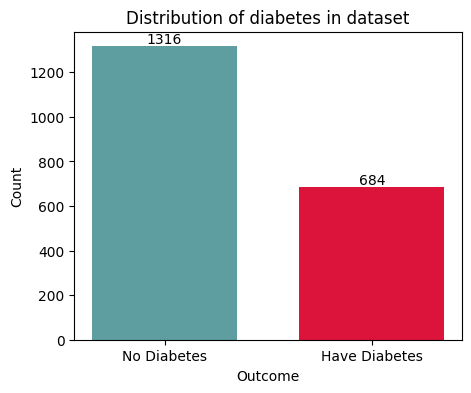

In [156]:
import matplotlib.pyplot as plt

# Get the counts of individuals without and with diabetes
countNoDiabetes = len(df[df.Outcome == 0])
countHaveDiabetes = len(df[df.Outcome == 1])
fig = plt.figure(figsize=(5,4))
# Create a bar plot with two bars
x=[countNoDiabetes,countHaveDiabetes]
plt.bar(['No Diabetes', 'Have Diabetes'], [countNoDiabetes, countHaveDiabetes],width=0.7, color=['cadetblue', 'crimson'])
for i in range(len(x)):
    plt.annotate((x[i]), xy=(i, x[i]), ha='center', va='bottom')
# Add a title and axis labels
plt.title('Distribution of diabetes in dataset')
plt.xlabel('Outcome')
plt.ylabel('Count')
# Show the plot
plt.show()


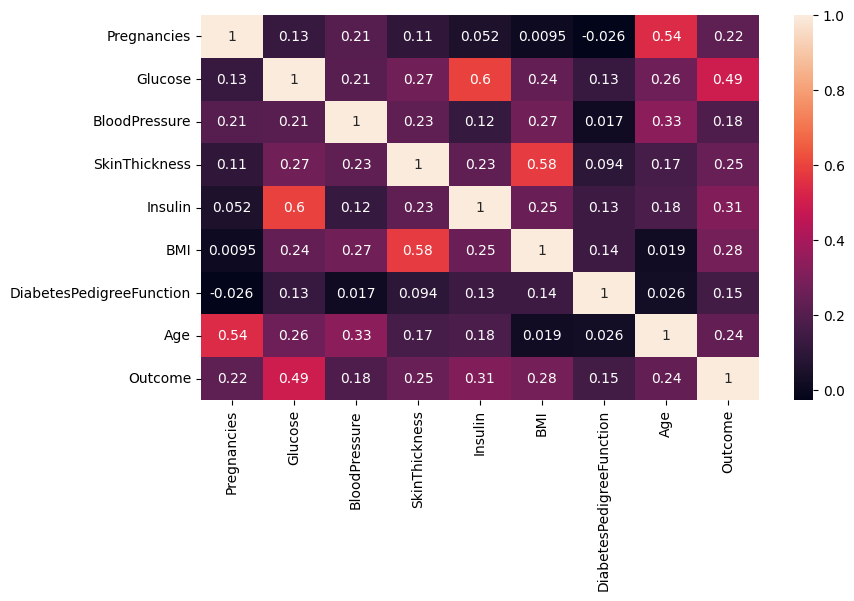

In [157]:
plt.figure(figsize=(9,5))
p=sns.heatmap(df1.corr(), annot=True)

<Axes: ylabel='Frequency'>

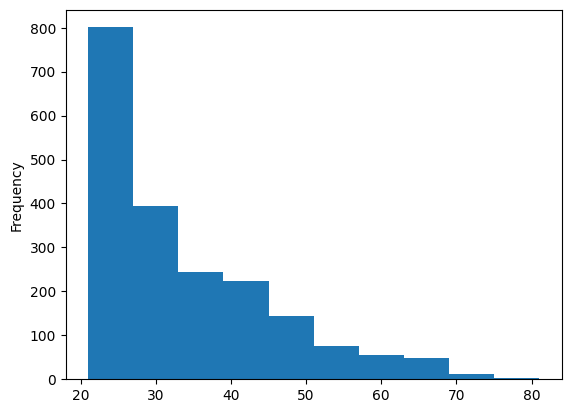

In [158]:
df1['Age'].plot(kind='hist')

C:\Users\panka\AppData\Local\Temp\ipykernel_15288\2010895867.py:8: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend("Diabetes","No diabetes")


C:\Users\panka\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\panka\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


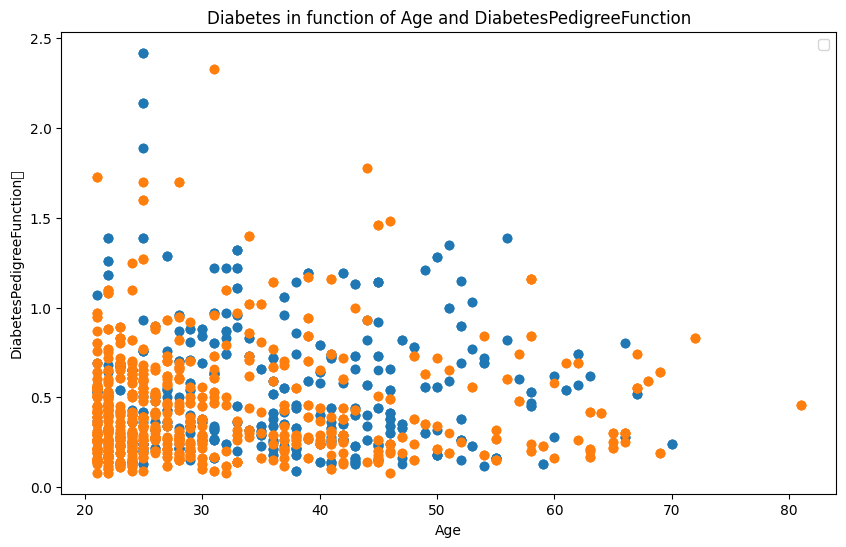

In [159]:
plt.figure(figsize=(10,6))
plt.scatter(x=df1[df1['Outcome']==1]['Age'],y=df1.DiabetesPedigreeFunction [df1.Outcome==1])
plt.scatter(x=df1[df1['Outcome']==0]['Age'],y=df1.DiabetesPedigreeFunction [df1.Outcome==0])

plt.title("Diabetes in function of Age and DiabetesPedigreeFunction")
plt.xlabel("Age")
plt.ylabel("DiabetesPedigreeFunction	")
plt.legend("Diabetes","No diabetes")

<Axes: ylabel='Density'>

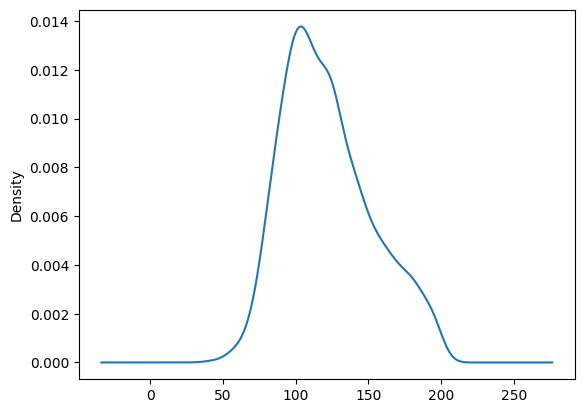

In [160]:
df['Glucose'].plot(kind='kde')

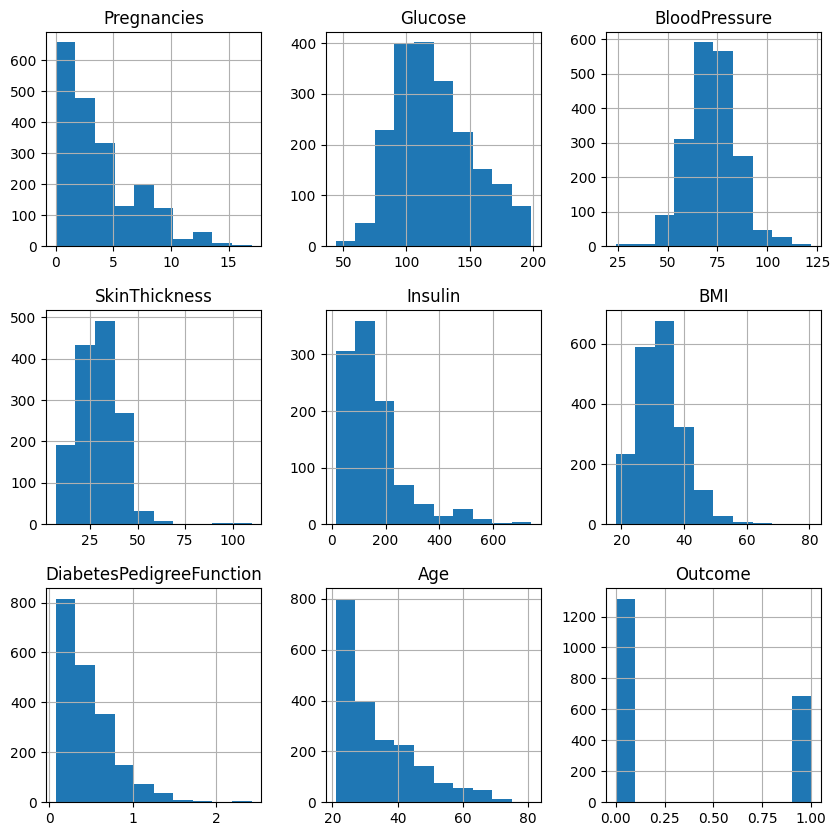

In [161]:
p = df.hist(figsize = (10,10))

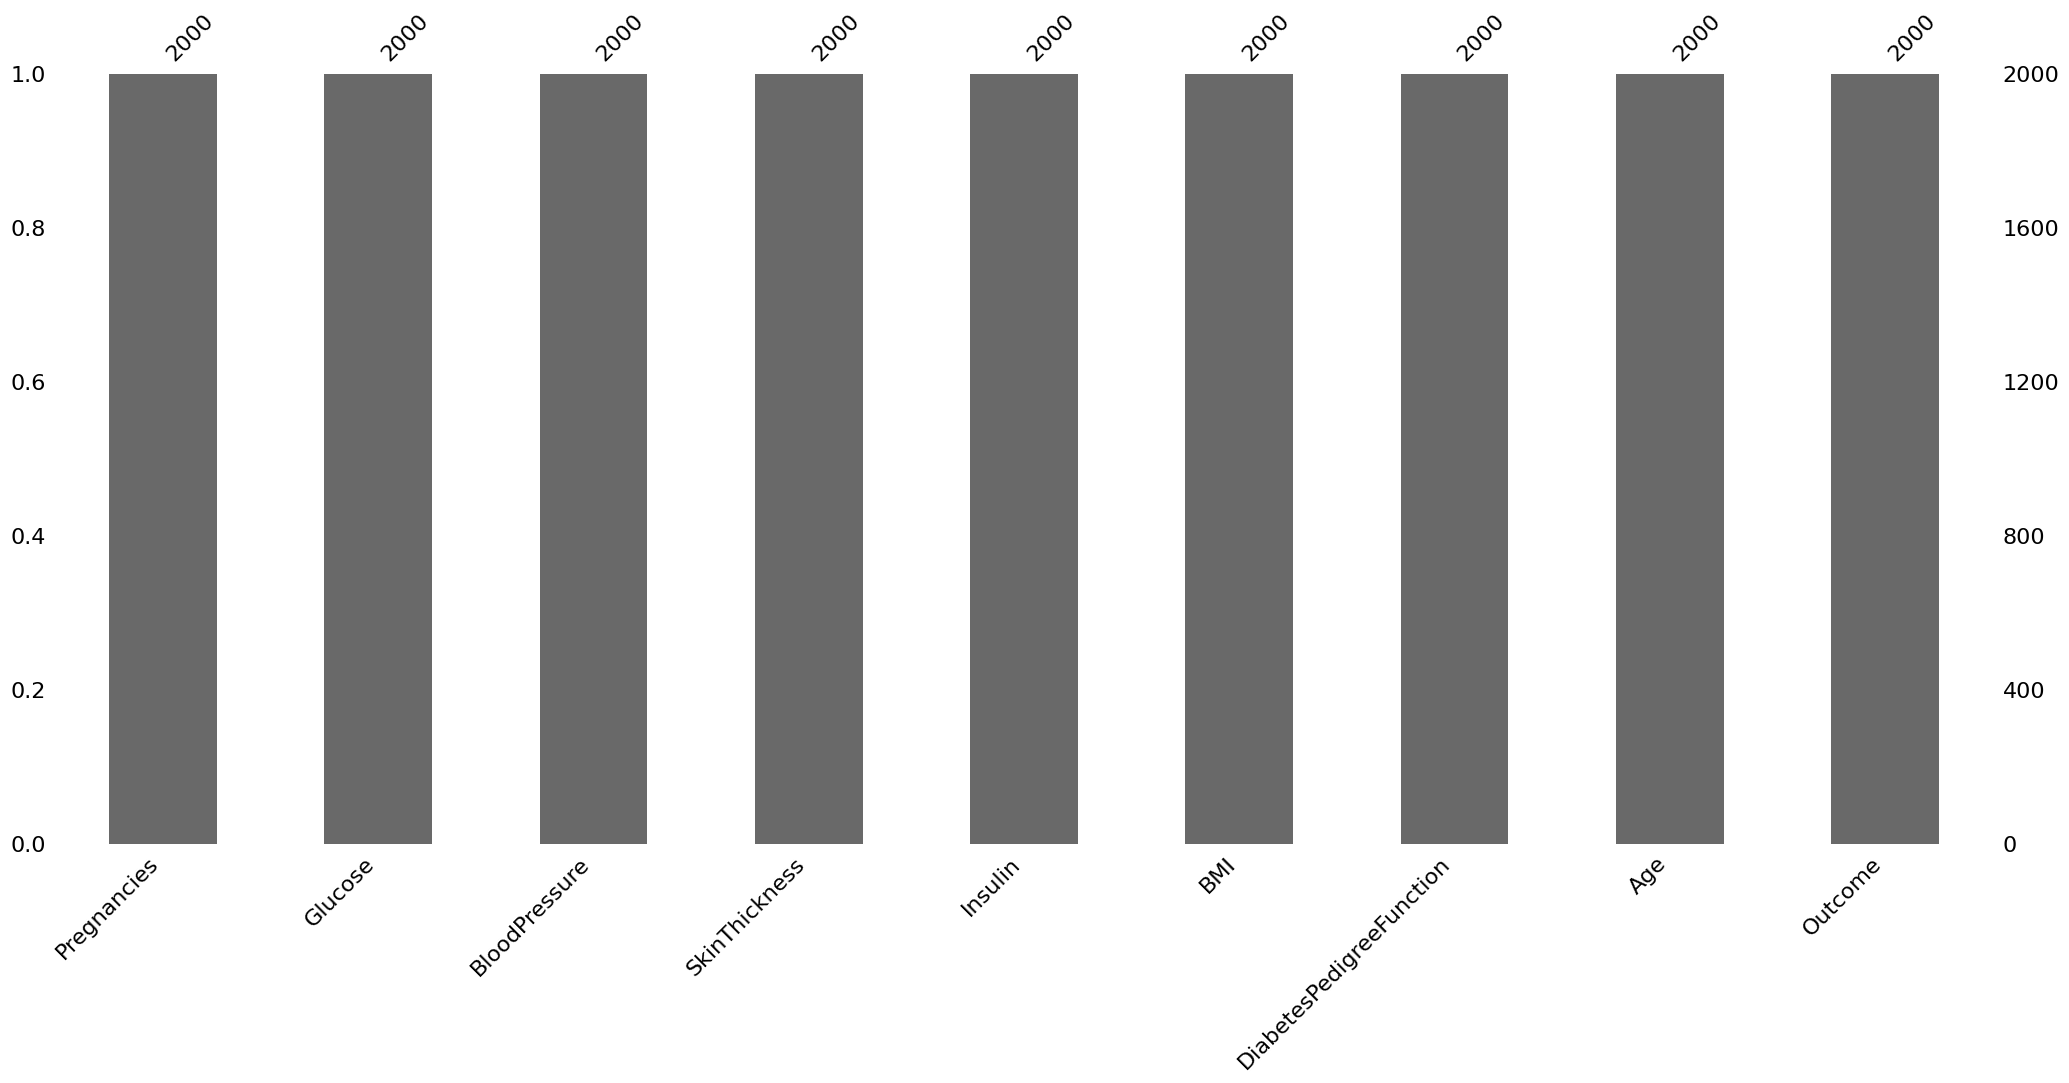

In [162]:
p = msno.bar(df1)

C:\Users\panka\AppData\Local\Temp\ipykernel_15288\1909075677.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Insulin'])


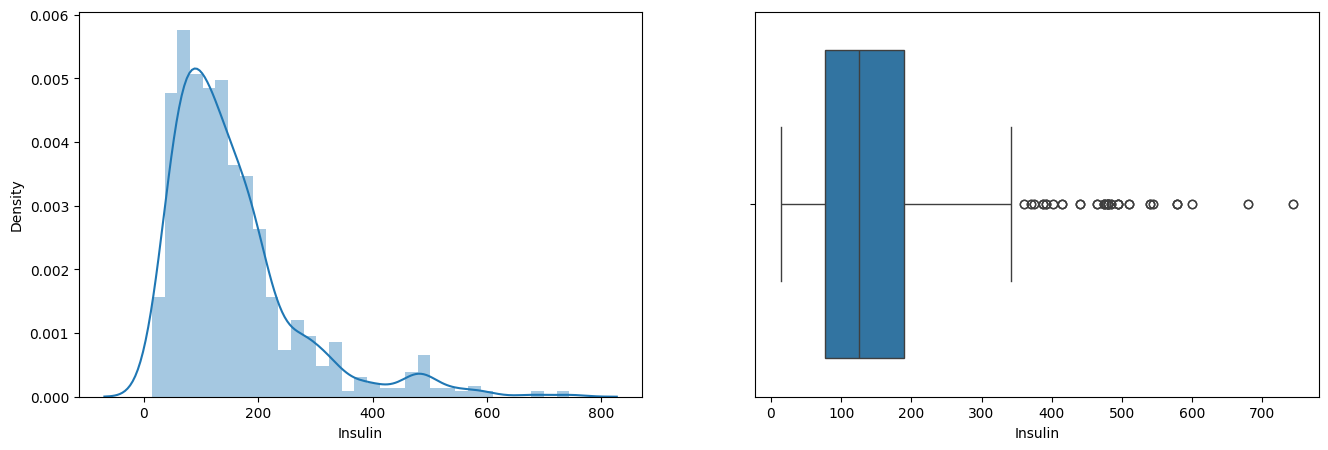

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.distplot(df['Insulin'])

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Insulin'])

plt.show()


In [164]:
df['BloodPressure'].value_counts()

BloodPressure
74.0     145
70.0     144
78.0     128
68.0     125
64.0     120
72.0     118
80.0      98
62.0      94
76.0      93
60.0      92
82.0      83
88.0      67
66.0      65
84.0      61
90.0      55
58.0      54
86.0      53
56.0      31
54.0      31
50.0      31
52.0      29
75.0      20
65.0      19
94.0      18
85.0      14
48.0      13
92.0      12
44.0      11
100.0      9
106.0      9
96.0       8
98.0       8
110.0      7
46.0       6
108.0      5
104.0      5
55.0       4
61.0       4
38.0       3
114.0      3
30.0       3
102.0      3
122.0      3
24.0       2
95.0       2
40.0       2
Name: count, dtype: int64

In [165]:
df['Glucose'].value_counts()

Glucose
99.0     49
100.0    44
102.0    39
129.0    37
112.0    36
         ..
67.0      2
191.0     2
44.0      2
62.0      2
177.0     2
Name: count, Length: 135, dtype: int64

In [166]:
pd.crosstab(df['Outcome'],df['Glucose'])

Glucose,44.0,56.0,57.0,61.0,62.0,65.0,67.0,68.0,71.0,72.0,...,189.0,190.0,191.0,193.0,194.0,195.0,196.0,197.0,198.0,199.0
Outcome,,,,,,,,,,,,,,,,,,,,,
0,2,3,5,3,2,3,2,7,9,4,...,2,0,2,2,5,0,0,2,0,0
1,0,0,0,0,0,0,0,0,0,0,...,6,3,0,4,5,8,5,6,2,3


In [167]:
pd.crosstab(df['Outcome'],df['BloodPressure'])

BloodPressure,24.0,30.0,38.0,40.0,44.0,46.0,48.0,50.0,52.0,54.0,...,96.0,98.0,100.0,102.0,104.0,106.0,108.0,110.0,114.0,122.0
Outcome,,,,,,,,,,,,,,,,,,,,,
0,2,0,3,2,11,6,11,20,21,26,...,8,3,6,0,0,6,3,2,0,3
1,0,3,0,0,0,0,2,11,8,5,...,0,5,3,3,5,3,2,5,3,0


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

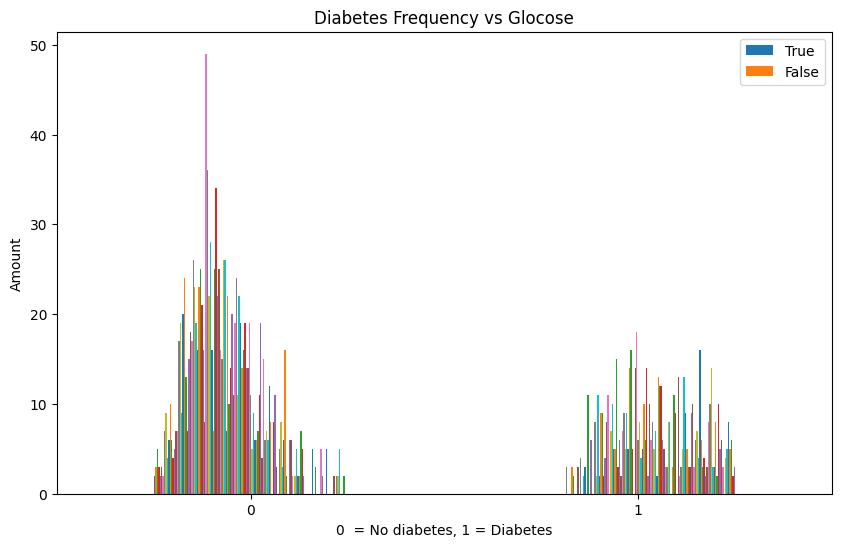

In [168]:
pd.crosstab(df['Outcome'],df['Glucose']).plot(kind='bar',figsize=(10,6));
plt.title("Diabetes Frequency vs Glocose")
plt.xlabel("0  = No diabetes, 1 = Diabetes")
plt.ylabel("Amount")
plt.legend(["True","False"])
plt.xticks(rotation=0)

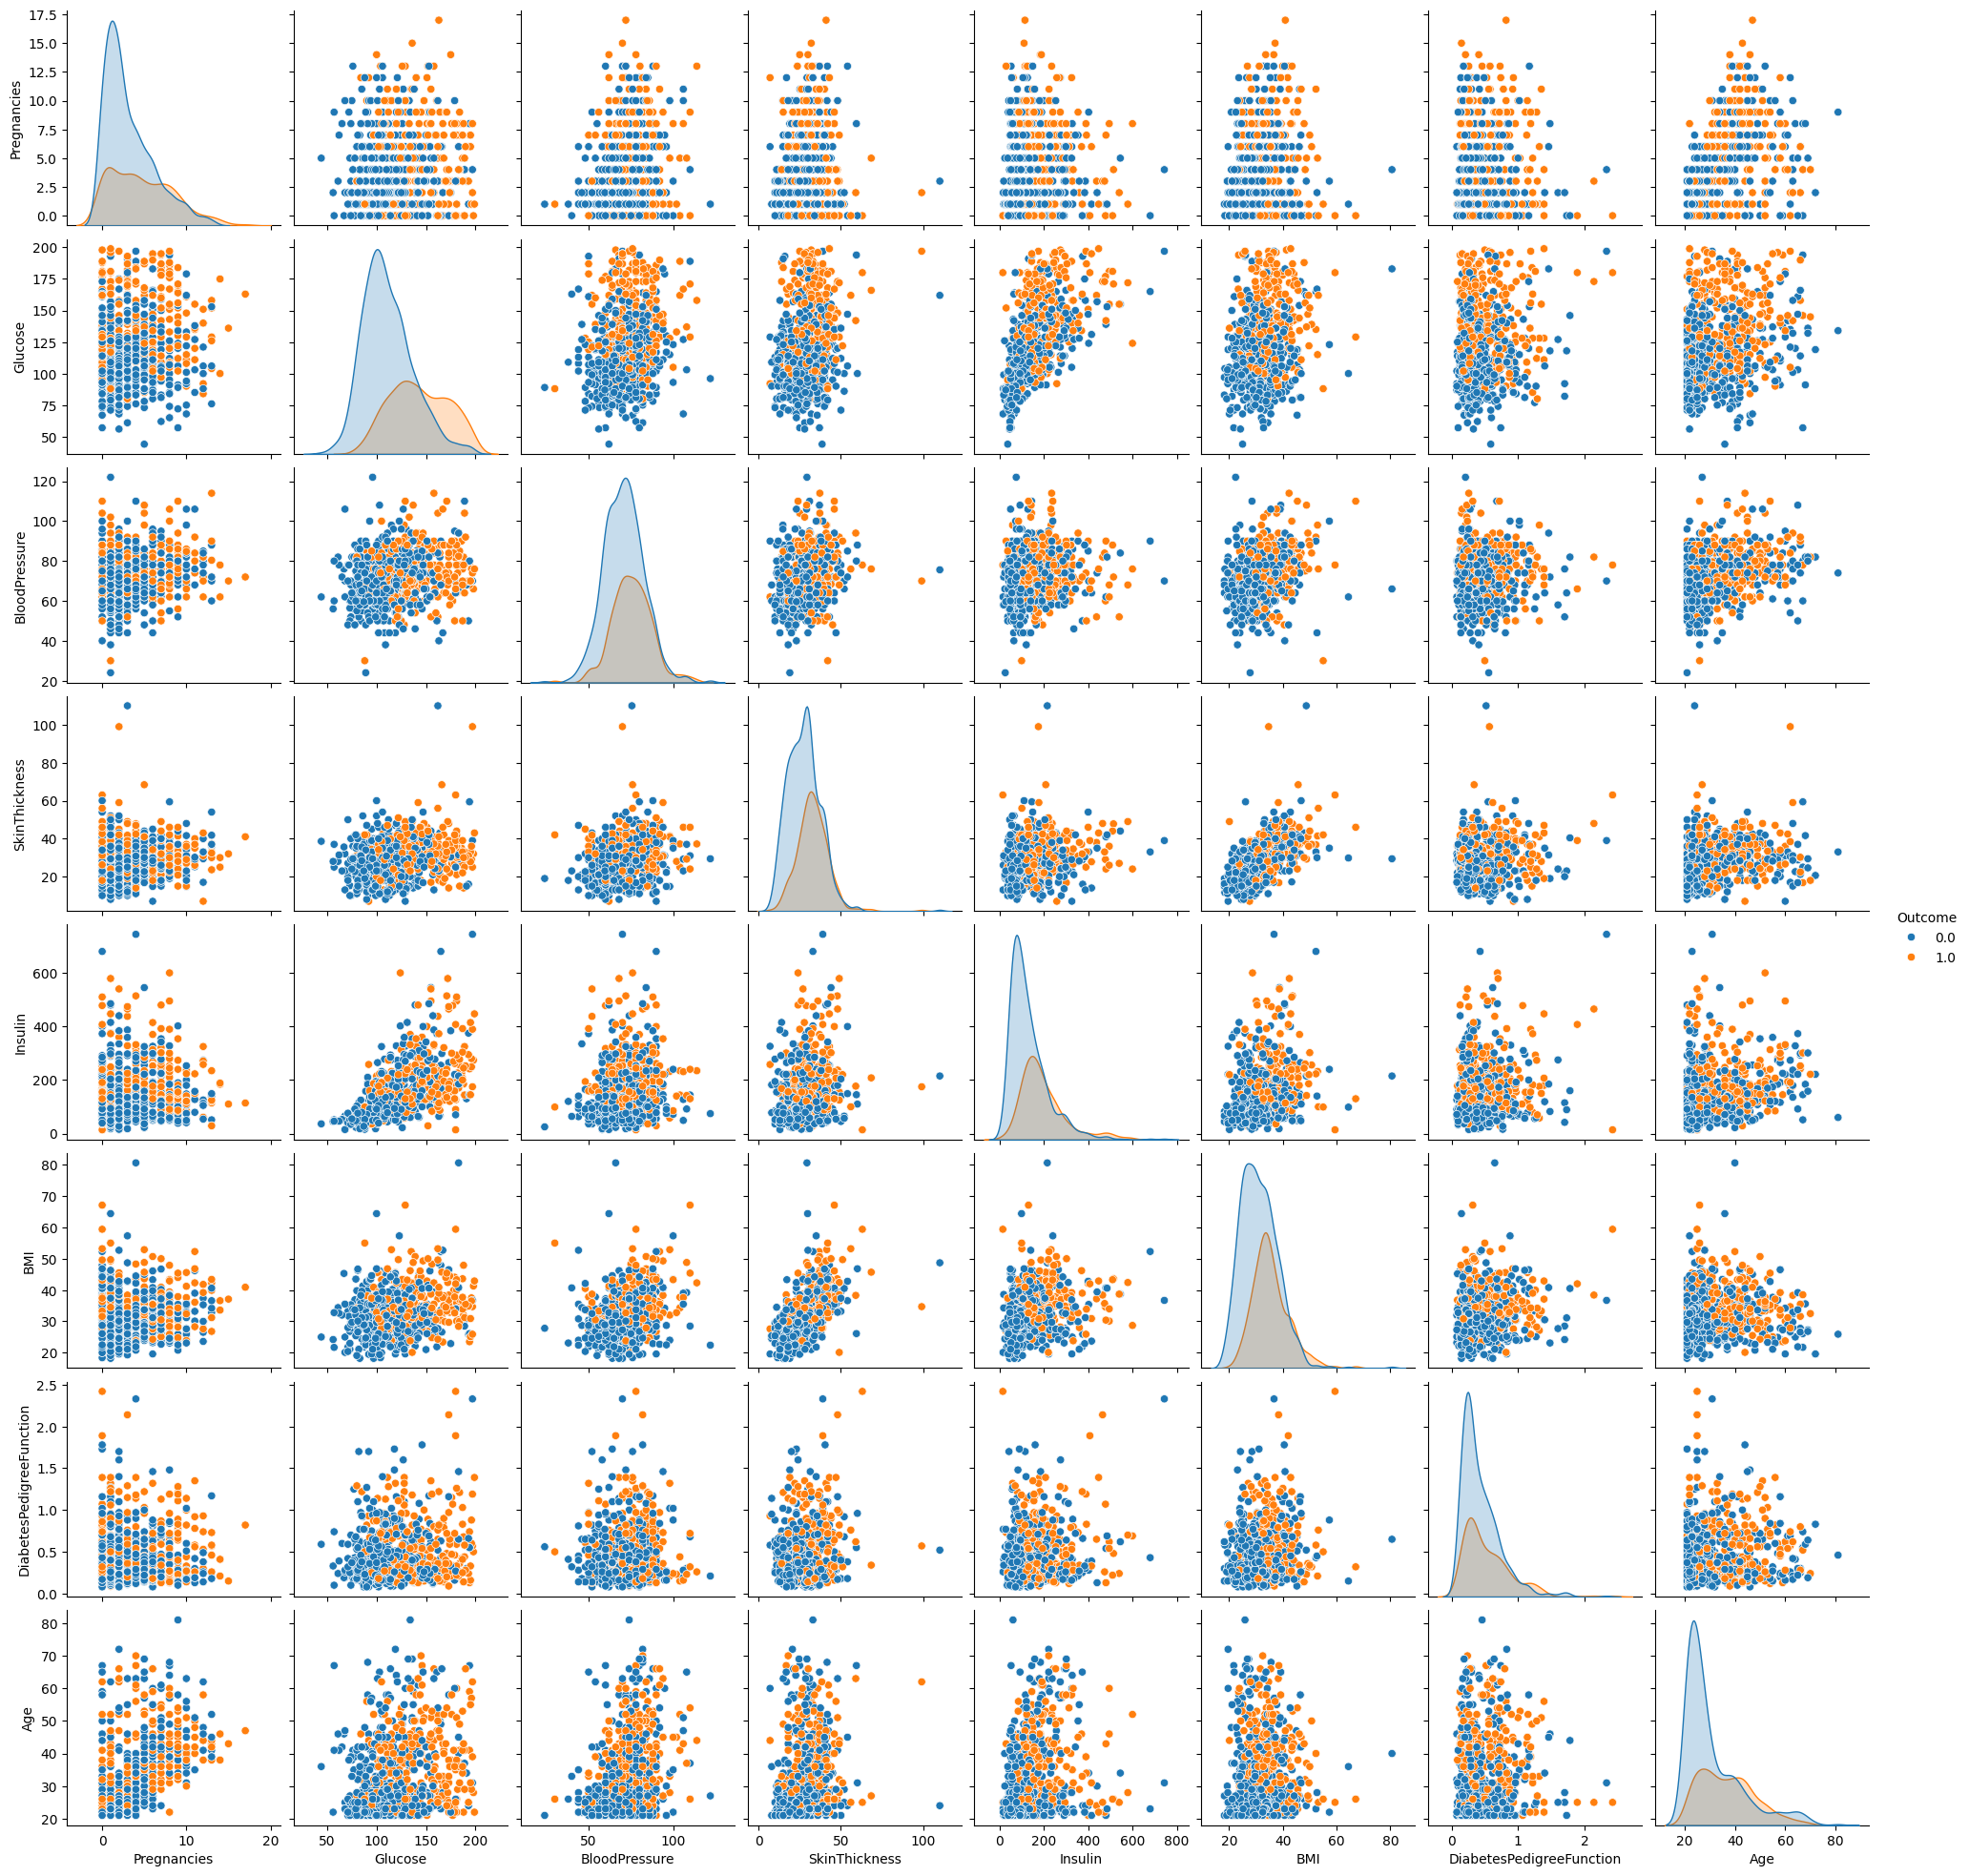

In [169]:
sns.pairplot(df1, hue='Outcome')

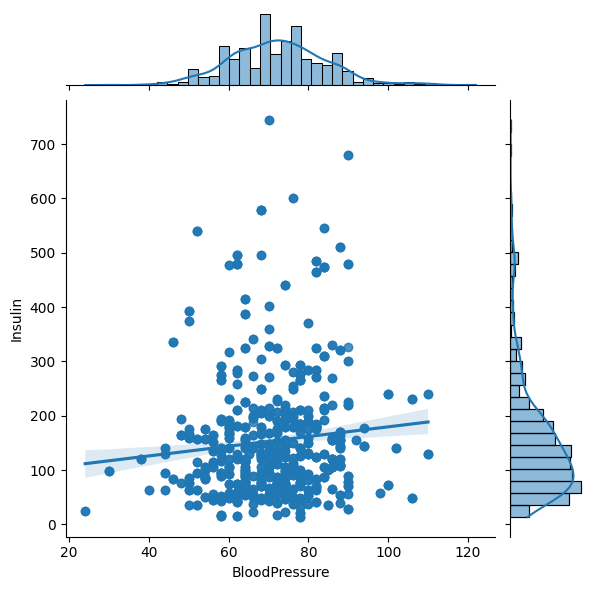

In [170]:
sns.jointplot(x="BloodPressure",y="Insulin",data=df, kind="reg")

####In the above graph as we can see that most of the points are concentrated towards the regression line which means that there is a high relation between the two features i.e. Insulin and Blood pressure. Also the histogram seems to be less skewed meaning that there are lesser number of outliers.


###Train Test Split

In [171]:
df2 = df1.drop(['Outcome'],axis=1)

In [172]:

X = df1.drop(['Outcome'],axis=1)
y = df1['Outcome']

In [173]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,138.0,62.0,35.0,134.8,33.6,0.13,47.0
1,0.0,84.0,82.0,31.0,125.0,38.2,0.23,23.0
2,0.0,145.0,79.6,38.0,240.8,44.2,0.63,31.0
3,0.0,135.0,68.0,42.0,250.0,42.3,0.36,24.0
4,1.0,139.0,62.0,41.0,480.0,40.7,0.54,21.0


In [174]:
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: Outcome, dtype: float64

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [176]:
X_test.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [177]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


###SVM, DT, LR

In [178]:
from sklearn.metrics import recall_score, f1_score, confusion_matrix, precision_score

In [179]:
svm_model = SVC(kernel='linear',probability=True)
svm_model.fit(X_train_scaled,y_train)
y_pred = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test,y_pred)
recall_svm = recall_score(y_test,y_pred)
precision_svm = precision_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred)
print("Accuracy of SVM is ",round(accuracy_svm,3)*100,"%")
print("Recall of SVM is ",round(recall_svm,3)*100,"%")
print("Precision of SVM is ",round(precision_svm,3)*100,"%")
print("F1 of SVM is ",round(f1_svm,3)*100,"%")

Accuracy of SVM is  78.7 %
Recall of SVM is  58.3 %
Precision of SVM is  75.5 %
F1 of SVM is  65.8 %


In [180]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled,y_train)
y_pred = lr_model.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test,y_pred)
f1_lr = f1_score(y_test,y_pred)
print("Accuracy of LR is ",round(accuracy_lr,3)*100,"%")
print("F1 of LR is ",round(f1_lr,3)*100,"%")

Accuracy of LR is  79.7 %
F1 of LR is  67.60000000000001 %


In [181]:
dt_model = DecisionTreeClassifier(max_depth=7)
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred)
f1_dt = f1_score(y_test,y_pred)
print("Accuracy of DT is ",round(accuracy_dt,3)*100,"%")
print("F1 ",round(f1_dt,3))

Accuracy of DT is  90.8 %
F1  0.869


###AdaBoost with weak learners as DT, LR and SVM without weights:

In [182]:
svm = SVC(kernel='linear', probability=True)
adaboost_svm = AdaBoostClassifier(estimator=svm, n_estimators=30)
adaboost_svm.fit(X_train_scaled,y_train)
y_pred = adaboost_svm.predict(X_test_scaled)
accuracy_ada_svm = accuracy_score(y_test, y_pred)
f1_ada_svm = f1_score(y_test,y_pred)
print('Accuracy of AdaBoost with SVM weak learner:', round(accuracy_ada_svm,3)*100,"%")
print('F1 of AdaBoost with SVM weak learner:', round(f1_ada_svm,3)*100,"%")

c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of AdaBoost with SVM weak learner: 70.5 %
F1 of AdaBoost with SVM weak learner: 33.2 %


In [184]:
dt = DecisionTreeClassifier(max_depth=9)
adaboost_dt = AdaBoostClassifier(estimator=dt, n_estimators = 20)
adaboost_dt.fit(X_train,y_train)
y_pred = adaboost_dt.predict(X_test)
accuracy_ada_dt = accuracy_score(y_test,y_pred)
f1_ada_dt = f1_score(y_test,y_pred)
print("Accuracy of Adaboost with decision tree as weak learner is : ",round(accuracy_ada_dt,3)*100,"%")
print("F1 of Adaboost with decision tree as weak learner is : ",round(f1_ada_dt,3)*100,"%")

c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of Adaboost with decision tree as weak learner is :  97.2 %
F1 of Adaboost with decision tree as weak learner is :  95.89999999999999 %


In [186]:
lr = LogisticRegression(max_iter=100)
adaboost_lr = AdaBoostClassifier(estimator=lr, n_estimators = 30)
adaboost_lr.fit(X_train_scaled,y_train)
y_pred = adaboost_lr.predict(X_test_scaled)
accuracy_ada_lr = accuracy_score(y_test,y_pred)
f1_ada_lr = f1_score(y_test,y_pred)
print("Accuracy of Adaboost with Logistic regression as weak learner is : ",round(accuracy_ada_lr,3)*100,"%")
print("f1 of Adaboost with Logistic regression as weak learner is : ",round(f1_ada_lr,3)*100,"%")

c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of Adaboost with Logistic regression as weak learner is :  79.5 %
f1 of Adaboost with Logistic regression as weak learner is :  67.0 %


###AdaBoost with weak learners DT, LR and SVM with bias weights


In [187]:
ada_bias_dt = AdaBoostClassifier(estimator=dt,n_estimators = 25)
sample_weights = [0.7 if i == 1 else 0.4 for i in y_train]
ada_bias_dt.fit(X_train, y_train, sample_weight=sample_weights)
y_pred = ada_bias_dt.predict(X_test)
accuracy_bias_dt = accuracy_score(y_test,y_pred)
f1_bias_dt = f1_score(y_test,y_pred)
print("Accuracy of adaboost bias weights dt ",round(accuracy_bias_dt,3)*100,"%")
print("F1",round(f1_bias_dt,2))

c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of adaboost bias weights dt  97.8 %
F1 0.97


In [189]:
ada_bias_lr = AdaBoostClassifier(estimator=lr, n_estimators=30)
sample_weights = [0.8 if i == 1 else 0.2 for i in y_train]
ada_bias_lr.fit(X_train_scaled, y_train, sample_weight=sample_weights)
y_pred = ada_bias_lr.predict(X_test_scaled)
accuracy_bias_lr = accuracy_score(y_test,y_pred)
f1_bias_lr = f1_score(y_test,y_pred)
print("Accuracy of adaboost bias weights lr ",round(accuracy_bias_lr,3)*100,"%")
print("f1 of adaboost bias weights lr ",round(f1_bias_lr,3)*100,"%")

c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of adaboost bias weights lr  70.8 %
f1 of adaboost bias weights lr  69.39999999999999 %


In [191]:
svm = SVC(kernel="linear",probability=True)
ada_bias_svm = AdaBoostClassifier(estimator=svm, n_estimators=30)
sample_weights = [0.8 if i == 1 else 0.2 for i in y_train]
ada_bias_svm.fit(X_train_scaled, y_train,sample_weight=sample_weights)
y_pred = ada_bias_svm.predict(X_test_scaled)
accuracy_bias_svm = accuracy_score( y_test, y_pred)
f1_bias_svm = f1_score(y_test,y_pred)
print("Accuracy of adaboost bias weights svm ",round(accuracy_bias_svm,3)*100,"%")
print("F1 of adaboost bias weights svm ",round(f1_bias_svm,3)*100,"%")

c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of adaboost bias weights svm  68.0 %
F1 of adaboost bias weights svm  17.9 %


###XGBoost

In [193]:
%pip install xgboost
import xgboost as xgb
xgb_ = xgb.XGBClassifier()
xgb_.fit(X_train_scaled, y_train)
y_pred = xgb_.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred)
f1_xgb = f1_score(y_test,y_pred)

print("Accuracy:", round(accuracy_xgb,3)*100,"%")
print("F1 score:", round(f1_xgb,3)*100,"%")


   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 1.3 MB/s eta 0:01:18
   ---------------------------------------- 0.0/99.8 MB 1.3 MB/s eta 0:01:18
   ---------------------------------------- 0.0/99.8 MB 1.3 MB/s eta 0:01:18
   ---------------------------------------- 0.1/99.8 MB 393.8 kB/s eta 0:04:14
   ---------------------------------------- 0.1/99.8 MB 437.6 kB/s eta 0:03:48
   ---------------------------------------- 0.2/99.8 MB 510.2 kB/s eta 0:03:16
   ---------------------------------------- 0.2/99.8 MB 689.2 kB/s eta 0:02:25
   ---------------------------------------- 0.3/99.8 MB 684.6 kB/s eta 0:02:26
   ---------------------------------------- 0.4/99.8 MB 882.8 kB/s eta 0:01:53
   ---------------------------------------- 0.5/99.8 MB 1.1 MB/s eta 0:01:32
   ---------------------------------------- 0.5/99.8 MB 1.1 MB/s eta 0:01:32
   ---------------------------------------- 0.5/99.8 MB 1.1 MB/s eta 0

###LightGBM

In [195]:
%pip install lightgbm
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',
    'num_leaves': 20,
    'feature_fraction': 0.6,
    'bagging_fraction': 0.7,
    'bagging_freq': 5,
    'random_state':42
}
num_rounds = 100
model = lgb.train(params, train_data, num_rounds)
y_pred = model.predict(X_test)
y_pred_class = np.round(y_pred)
accuracy_lgb = accuracy_score(y_test, y_pred_class)
f1_lgb = f1_score(y_test,y_pred_class)
print('Accuracy:', round(accuracy_lgb,3)*100,"%")
print('F1 score : ',round(f1_lgb,3))

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.3 MB 2.0 MB/s eta 0:00:01
   ------ --------------------------------- 0.2/1.3 MB 2.6 MB/s eta 0:00:01
   ------- -------------------------------- 0.2/1.3 MB 1.8 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.3 MB 2.3 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.3 MB 2.9 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.3 MB 2.9 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.3 MB 2.9 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.3 MB 2.9 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.3 MB 2.9 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.3 MB 2.9 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.3 MB 2.9 MB/s eta 0:00:01
   --------------------- ------------------ 0.7/1.3 MB 1.2 MB/s eta 0:00:01
   ----------------

###SVM with radial bias function

In [196]:
svm_rbf = SVC(kernel='rbf',probability=True)
svm_rbf.fit(X_train, y_train)
y_pred = svm_rbf.predict(X_test)

accuracy_svm_rbf = accuracy_score(y_test, y_pred)
f1_svm_rbf = f1_score(y_test, y_pred)

print("Accuracy:", round(accuracy_svm_rbf,3))
print("F1-score:", round(f1_svm_rbf,3))

Accuracy: 0.777
F1-score: 0.626


###ANN

In [215]:
%pip install --upgrade keras tensorflow
keras.config.disable_traceback_filtering()
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=1)
y_pred = model.predict(X_test)
accuracy_ann = accuracy_score(y_test, y_pred.round())
f1_ann = f1_score(y_test, y_pred.round())
print("Accuracy:", round(accuracy_ann, 3))
print("F1-score:", f1_ann)


Note: you may need to restart the kernel to use updated packages.
Epoch 1/10


c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


AttributeError: module 'keras.src.backend' has no attribute 'convert_to_numpy'

###KNN

In [202]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)
print("Accuracy:", round(accuracy_knn,3))
print("F1-score:", round(f1_knn,2))


Accuracy: 0.797
F1-score: 0.72


###Random Forest Classifier

In [203]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

print("Accuracy:", round(accuracy_rf,3))
print("F1-score:", round(f1_rf,2))


Accuracy: 0.97
F1-score: 0.96


###Naive Bayes

In [204]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

# Use the model to predict the target values of the test data
y_pred = nb.predict(X_test)

# Calculate the accuracy of the model
accuracy_nb = accuracy_score(y_test, y_pred)
f1_nb = f1_score(y_test,y_pred)

print(f"Accuracy: {round(accuracy_nb,3)}")
print(f"F1 score: {round(f1_nb,2)}")

Accuracy: 0.782
F1 score: 0.69


In [205]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train,y_train)
y_pred = adaboost.predict(X_test)
# Calculate the accuracy of the model
accuracy_ada = accuracy_score(y_test, y_pred)
f1_ada = f1_score(y_test,y_pred)

print(f"Accuracy: {round(accuracy_ada,3)}")
print(f"F1 score: {round(f1_ada,2)}")

c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.798
F1 score: 0.7


###AdaBoost with decision tree as weak learner and bias weights: Variations in  hyperparameters

In [206]:
ada_bias_dt_1 = AdaBoostClassifier(estimator=dt,n_estimators = 10,algorithm='SAMME', random_state=42)
sample_weights = [0.7 if i == 1 else 0.4 for i in y_train]
ada_bias_dt_1.fit(X_train, y_train, sample_weight=sample_weights)
y_pred = ada_bias_dt_1.predict(X_test)
accuracy_bias_dt_1 = accuracy_score(y_test,y_pred)
f1_bias_dt_1 = f1_score(y_test,y_pred)
print("Accuracy of adaboost bias weights dt ",round(accuracy_bias_dt_1,3)*100,"%")
print("F1",round(f1_bias_dt_1,2))

Accuracy of adaboost bias weights dt  98.3 %
F1 0.98


In [207]:
ada_bias_dt_2 = AdaBoostClassifier(estimator=dt,n_estimators = 50,algorithm='SAMME',random_state=42)
sample_weights = [0.7 if i == 1 else 0.4 for i in y_train]
ada_bias_dt_2.fit(X_train, y_train, sample_weight=sample_weights)
y_pred = ada_bias_dt_2.predict(X_test)
accuracy_bias_dt_2 = accuracy_score(y_test,y_pred)
f1_bias_dt_2 = f1_score(y_test,y_pred)
print("Accuracy of adaboost bias weights dt ",round(accuracy_bias_dt_2,3)*100,"%")
print("F1",round(f1_bias_dt_2,2))

Accuracy of adaboost bias weights dt  98.2 %
F1 0.97


In [208]:
ada_bias_dt_3 = AdaBoostClassifier(estimator=dt,n_estimators = 10,algorithm='SAMME')
sample_weights = [0.7 if i == 1 else 0.4 for i in y_train]
ada_bias_dt_3.fit(X_train, y_train, sample_weight=sample_weights)
y_pred = ada_bias_dt_3.predict(X_test)
accuracy_bias_dt_3 = accuracy_score(y_test,y_pred)
f1_bias_dt_3 = f1_score(y_test,y_pred)
print("Accuracy of adaboost bias weights dt ",round(accuracy_bias_dt_3,3)*100,"%")
print("F1",round(f1_bias_dt_3,2))

Accuracy of adaboost bias weights dt  96.0 %
F1 0.94


###Comparison of All the model's accuracies

In [217]:
import matplotlib.pyplot as plt

model_names = ['DT', 'Ada+DT(no bias)', 'Ada+DT(bias)', 'SVM', 'Ada+SVM(no bias)', 'Ada+SVM(bias)', 'LR', 'Ada+LR(no bias)', 'Ada+LR(bias)', 'XGBoost', 'LGBM', 'SVM+RBF', 'ANN', 'KNN', 'RF', 'NB']
accuracies = [accuracy_dt, accuracy_ada_dt, accuracy_bias_dt, accuracy_svm, accuracy_ada_svm, accuracy_bias_svm, accuracy_lr, accuracy_ada_lr, accuracy_bias_lr, accuracy_xgb, accuracy_lgb, accuracy_svm_rbf, accuracy_ann, accuracy_knn, accuracy_rf, accuracy_nb]

fig = plt.figure(figsize=(12,5))
plt.bar(model_names, accuracies, color='cadetblue', width=0.8)

for i in range(len(model_names)):
    plt.annotate(str(round(accuracies[i], 2)), xy=(i, accuracies[i]), ha='center', va='bottom')

plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.xticks(rotation=80) # rotate x-axis labels by 45 degrees

plt.show()


NameError: name 'accuracy_ann' is not defined

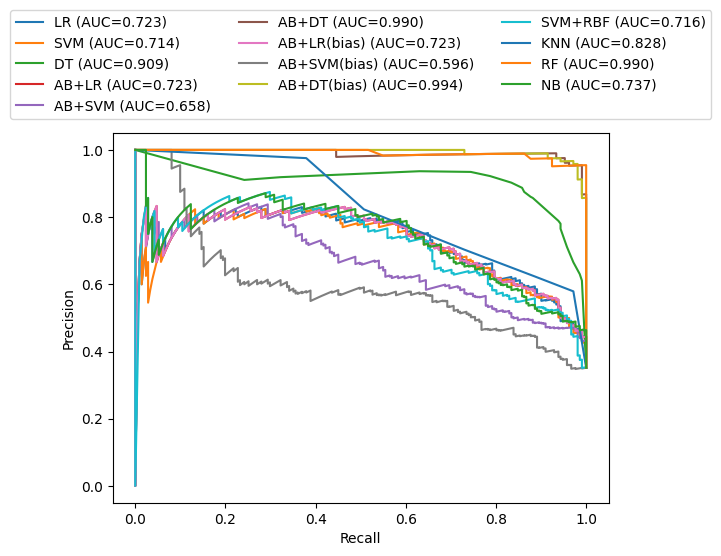

In [218]:
from sklearn.metrics import precision_recall_curve, auc
from matplotlib import pyplot as plt

# define your models and data
# models = [lr_model,svm_model,dt_model,adaboost_lr,adaboost_svm,adaboost_dt,ada_bias_lr,ada_bias_svm,ada_bias_dt,svm_rbf,model,knn,rf,nb]
models = [lr_model,svm_model,dt_model,adaboost_lr,adaboost_svm,adaboost_dt,ada_bias_lr,ada_bias_svm,ada_bias_dt,svm_rbf,knn,rf,nb]
data = [X_test_scaled, X_test_scaled,X_test, X_test_scaled, X_test_scaled,X_test, X_test_scaled, X_test_scaled,X_test,X_test,X_test,X_test,X_test ]
labels = ['LR','SVM','DT','AB+LR','AB+SVM','AB+DT','AB+LR(bias)','AB+SVM(bias)','AB+DT(bias)','SVM+RBF','KNN','RF','NB']
# iterate through the models and plot the curves
for i in range(len(models)):
    model = models[i]
    X_test = data[i]
    y_score = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{labels[i]} (AUC={pr_auc:.3f})')


# add axis labels and legend
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.02), ncol=3)

# display the plot
plt.show()



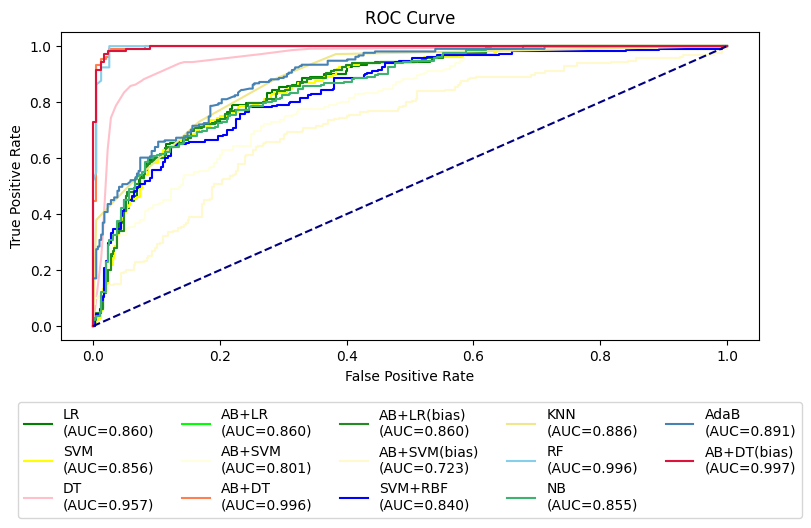

In [219]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

# define your models and data
# models = [lr_model,svm_model,dt_model,adaboost_lr,adaboost_svm,adaboost_dt,ada_bias_lr,ada_bias_svm,ada_bias_dt,svm_rbf,model,knn,rf,nb]
models = [lr_model,svm_model,dt_model,adaboost_lr,adaboost_svm,adaboost_dt,ada_bias_lr,ada_bias_svm,svm_rbf,knn,rf,nb,adaboost,ada_bias_dt]
data = [X_test_scaled, X_test_scaled,X_test, X_test_scaled, X_test_scaled,X_test, X_test_scaled, X_test_scaled,X_test,X_test,X_test,X_test,X_test,X_test ]
labels = ['LR','SVM','DT','AB+LR','AB+SVM','AB+DT','AB+LR(bias)','AB+SVM(bias)','SVM+RBF','KNN','RF','NB','AdaB','AB+DT(bias)']
# iterate through the models and plot the curves
colors = ['green','yellow','pink','lime','lightyellow','coral','forestgreen','lemonchiffon','blue','khaki','skyblue','mediumseagreen','steelblue','crimson']
fig = plt.figure(figsize=(9,4))

for i in range(len(models)):
    model = models[i]
    X_test = data[i]
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr,color=colors[i], label=f'{labels[i]}\n(AUC={roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# add axis labels and legend
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.6), ncol=5)


# display the plot
plt.show()


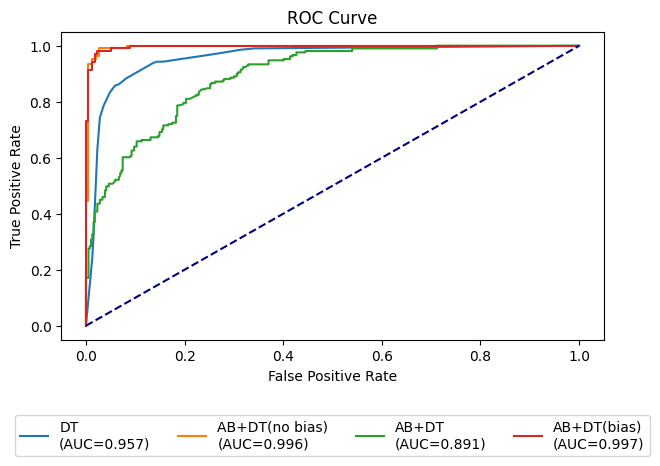

In [220]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

# define your models and data
# models = [lr_model,svm_model,dt_model,adaboost_lr,adaboost_svm,adaboost_dt,ada_bias_lr,ada_bias_svm,ada_bias_dt,svm_rbf,model,knn,rf,nb]
models = [dt_model,adaboost_dt,adaboost,ada_bias_dt]
data = [X_test,X_test,X_test,X_test ]
labels = ['DT','AB+DT(no bias)','AB+DT','AB+DT(bias)']
# iterate through the models and plot the curves
fig = plt.figure(figsize=(7,4))

for i in range(len(models)):
    model = models[i]
    X_test = data[i]
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{labels[i]}\n(AUC={roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# add axis labels and legend
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=4)


# display the plot
plt.show()


In [221]:
from sklearn.metrics import precision_recall_curve, auc
from matplotlib import pyplot as plt

# define your models and data
models = [lr_model,svm_model,dt_model,adaboost_lr,adaboost_svm,adaboost_dt,ada_bias_lr,ada_bias_svm,ada_bias_dt,svm_rbf,model,knn,rf,nb]
data = [X_test_scaled, X_test_scaled,X_test, X_test_scaled, X_test_scaled,X_test, X_test_scaled, X_test_scaled,X_test,X_test,X_test,X_test,X_test,X_test ]
labels = ['LR','SVM','DT','AB+LR','AB+SVM','AB+DT','AB+LR(bias)','AB+SVM(bias)','AB+DT(bias)','SVM+RBF','ANN','KNN','RF','NB']

f1_ = []
# iterate through the models and plot the curves
for i in range(len(models)):
    model = models[i]
    X_test = data[i]
    y_pred = model.predict(X_test)
    f1 =f1_score(y_test,y_pred)
    f1_.append(round(f1,3))
    print(labels[i],":",round(f1,3))


LR : 0.676
SVM : 0.658
DT : 0.869
AB+LR : 0.67
AB+SVM : 0.332
AB+DT : 0.959
AB+LR(bias) : 0.694
AB+SVM(bias) : 0.179
AB+DT(bias) : 0.969
SVM+RBF : 0.626
ANN : 0.969
KNN : 0.716
RF : 0.958
NB : 0.692


In [222]:
f1_scores = pd.DataFrame({'model':models,'F1 scores':f1_})

In [ ]:
f1_scores

: 

####Conclusion:
The best results are given by AdaBoost with Decision Tree as a weak learner with bias weight. However, there isn't very much difference between the biased and unbiased results.

In [223]:
import pickle

# Load the trained model (e.g., ada_bias_dt_1) from your model.py file
# Save the trained model to a file named 'model.pkl'
with open('model.pkl', 'wb') as file:
    pickle.dump(ada_bias_dt_1, file)

